# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [16]:
#Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

In [4]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [8]:
fraud.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [10]:
fraud.shape

(1000000, 8)

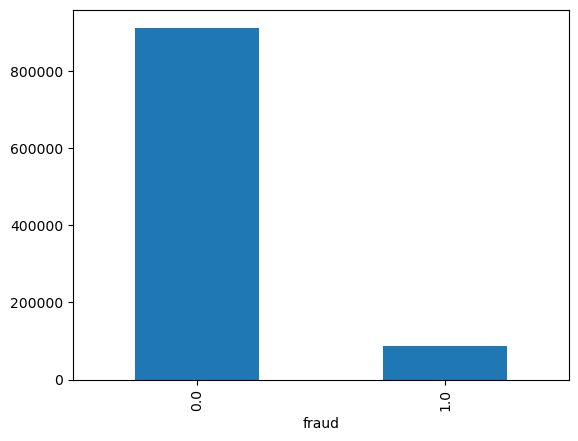

In [18]:
survived = fraud["fraud"].value_counts()
survived.plot(kind="bar")
plt.show()

The dataset is very imbalanced

In [29]:
features = fraud.drop(columns = ["fraud"])
target = fraud["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target,random_state=0)

In [46]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
X_train_scaled_df = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled_np, columns=X_test.columns, index=X_test.index)

In [50]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [53]:
log_reg.score(X_test_scaled, y_test)

0.959012

In [56]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228273
         1.0       0.89      0.60      0.72     21727

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.96    250000



We have a very high fit and acccuracy with 0,96 but this can be nuanced because our dataset is imbalanced

In [61]:
train = X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

In [108]:
train["fraud"] = y_train.values

In [110]:
fraud = train[train["fraud"] == 1]
legit = train[train["fraud"] == 0]

In [102]:
len(fraud),len(legit)

(65676, 684324)

In [116]:
yes_oversampled = resample(fraud,
                                    replace=True,
                                    n_samples = len(legit),
                                    random_state=0)

In [134]:
train_over = pd.concat([yes_oversampled, legit])
train_over.drop(columns = "Fraud", inplace = True)

In [136]:
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
769328,0.022408,-0.183986,0.992120,0.366317,1.361705,-0.334756,0.732342,1.0
347265,-0.396965,-0.128017,1.056225,-2.729877,-0.734374,-0.334756,-1.365482,1.0
175080,-0.188127,-0.155662,0.821662,0.366317,-0.734374,-0.334756,0.732342,1.0
635243,1.788784,-0.150307,-0.253831,0.366317,-0.734374,-0.334756,0.732342,1.0
801075,-0.041481,-0.177092,1.083831,0.366317,1.361705,-0.334756,0.732342,1.0
...,...,...,...,...,...,...,...,...
963395,0.683502,-0.071124,-0.607568,0.366317,-0.734374,-0.334756,0.732342,0.0
117952,-0.358147,0.292591,0.107062,0.366317,-0.734374,-0.334756,0.732342,0.0
435829,0.002289,-0.023247,-0.478098,0.366317,-0.734374,2.987249,-1.365482,0.0
305711,-0.223016,-0.183924,-0.011000,0.366317,-0.734374,-0.334756,0.732342,0.0


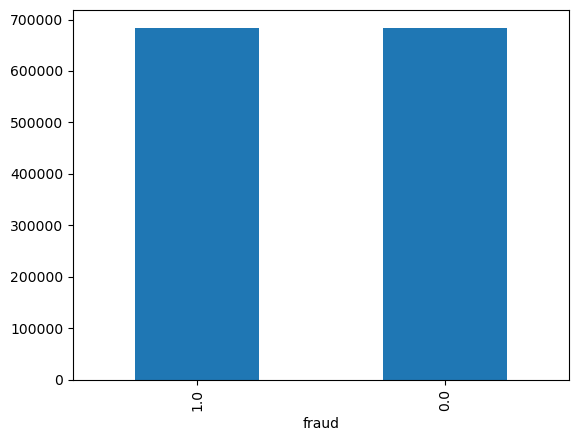

In [138]:
fraud_plt = train_over["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [140]:
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]

In [146]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [152]:
log_reg.score(X_train_over, y_train_over)

0.9411937912450827

In [148]:
y_pred_test_log = log_reg.predict(X_test_scaled_df)
print(classification_report(y_pred = y_pred_test_log, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228273
         1.0       0.57      0.95      0.71     21727

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



The model is still strong with 0,93 accuracy but lower than first attempt

In [213]:
no_undersampled = resample(legit,
                                    replace=False,
                                    n_samples = len(fraud),
                                    random_state=0)
no_undersampled.drop(columns='Fraud', inplace = True)
no_undersampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
681604,-0.337726,-0.097881,-0.114767,0.366317,-0.734374,-0.334756,0.732342,0.0
971349,0.176805,-0.137869,0.055000,0.366317,-0.734374,-0.334756,0.732342,0.0
796484,-0.373962,-0.104425,-0.300128,0.366317,-0.734374,-0.334756,-1.365482,0.0
699524,-0.388393,-0.177113,-0.576791,-2.729877,-0.734374,2.987249,-1.365482,0.0
575548,-0.306372,-0.070528,-0.629536,0.366317,-0.734374,-0.334756,-1.365482,0.0
...,...,...,...,...,...,...,...,...
773754,-0.154981,-0.077391,-0.303269,0.366317,-0.734374,-0.334756,-1.365482,0.0
317200,-0.377846,-0.157243,-0.477677,0.366317,-0.734374,-0.334756,0.732342,0.0
631191,0.360789,-0.062674,0.387490,0.366317,-0.734374,-0.334756,-1.365482,0.0
249121,-0.377066,-0.183883,-0.344867,0.366317,1.361705,-0.334756,0.732342,0.0


In [215]:
fraud["fraud"].unique()

array([1.])

In [233]:
train_under = pd.concat([no_undersampled, fraud])
train_under.drop(columns='Fraud', inplace = True)

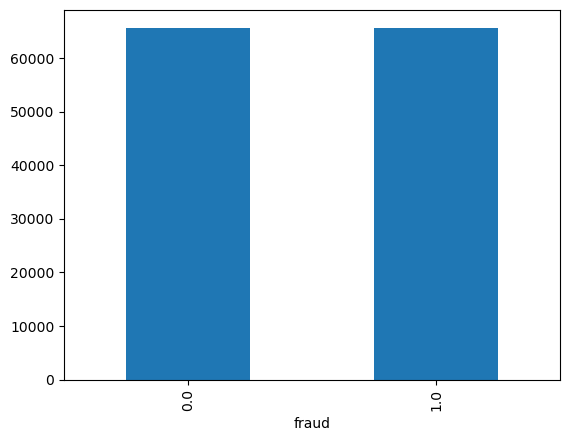

In [219]:
fraud2_plt = train_under["fraud"].value_counts()
fraud2_plt.plot(kind="bar")
plt.show()

In [235]:
X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]

In [237]:
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

In [246]:
log_reg.score(X_train_under, y_train_under)

0.9399247822644498

In [248]:
y_pred_test_log = log_reg.predict(X_test_scaled_df)
print(classification_report(y_pred = y_pred_test_log, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228273
         1.0       0.57      0.95      0.71     21727

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



Accuracy is even lower with undertraining

In [257]:
from imblearn.over_sampling import SMOTE

In [260]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [262]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

In [264]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [266]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228273
         1.0       0.57      0.95      0.71     21727

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



Accuracy is similar to underfitting model